In [8]:
#导入包
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [9]:
#分成数据集和测试集
housing = fetch_california_housing()
# print(housing.data.shape)

x_train_all, x_test_raw, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train_raw, x_valid_raw, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)

#对数据进行标准化处理
sca = StandardScaler()
x_train = sca.fit_transform(x_train_raw)
x_valid = sca.transform(x_valid_raw)
x_test = sca.transform(x_test_raw)


In [24]:
model = keras.models.Sequential()

input = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)

concate = keras.layers.concatenate([input, hidden2])    #

output = keras.layers.Dense(1)(concate)

model = keras.models.Model(inputs = [input], 
                           outputs = [output])



model.compile(loss = 'mean_squared_error', optimizer = 'adam')  
#因为是回归模型，所以判断模型好坏的标准就是均方差的大小，而不需要加上评价标准 metrics = ['accuracy']

history = model.fit(x_train, y_train,
                    validation_data = (x_valid, y_valid),
                    callbacks = [keras.callbacks.EarlyStopping(patience = 5, min_delta = 1e-3)], 
                    epochs = 10)



Tensor("concatenate_8/Identity:0", shape=(None, 38), dtype=float32)
Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 149us/sample - loss: 1.2491 - val_loss: 0.6289
Epoch 2/10
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4681 - val_loss: 0.4507
Epoch 3/10
11610/11610 [==============================] - 1s 72us/sample - loss: 0.3994 - val_loss: 0.4006
Epoch 4/10
11610/11610 [==============================] - 1s 77us/sample - loss: 0.3778 - val_loss: 0.3843
Epoch 5/10
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3654 - val_loss: 0.3745
Epoch 6/10
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3615 - val_loss: 0.3712
Epoch 7/10
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3709 - val_loss: 0.3495
Epoch 8/10
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3361 - val_loss: 0.4173
Epoch 9/10
11610/11610 [==

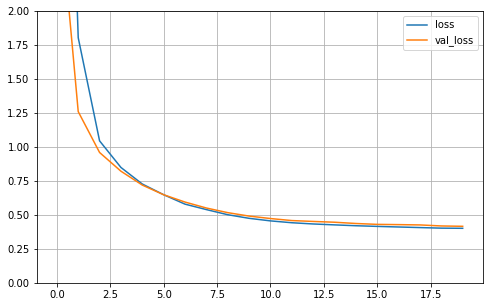

In [61]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
plot_learning_curves(history)



In [62]:
model.evaluate(x_train, y_train, verbose = False)

0.3987989259217958